In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing/bank-additional-names.txt
/kaggle/input/bank-marketing/bank-additional-full.csv


In [2]:
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import sklearn.metrics 
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/bank-marketing/bank-additional-full.csv', sep = ';')

In [4]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

*# Observing the data information it is known that there are 11 features with data type as objects which are needed to be converted into categorized numbers.(One hot encoding or label/feature converter)*

In [6]:
for c in df.columns:
    df[c].replace({'unknown': np.nan}, inplace=True)
    df.dropna(inplace=True)
    df.reset_index(inplace=True,drop=True)

In [7]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30484,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30485,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30486,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
value_counts_of_default_variable = df.default.value_counts()
print(value_counts_of_default_variable)

no     30485
yes        3
Name: default, dtype: int64


* As we can see the default feature has skewed data, which means it as the imbalanced data which might not help the model effectively for prediction. So it is not used as an input feature to the model. And also the duration time does not contribute to predict the output because the duration values will be obtained after the call is finished and once the call is finished the output label is known. *

In [9]:
df.drop("default",axis = 1,inplace = True)
df.drop("duration",axis = 1,inplace = True)

In [10]:
object_columns = df.select_dtypes(include='object')
features = object_columns.columns.to_list()

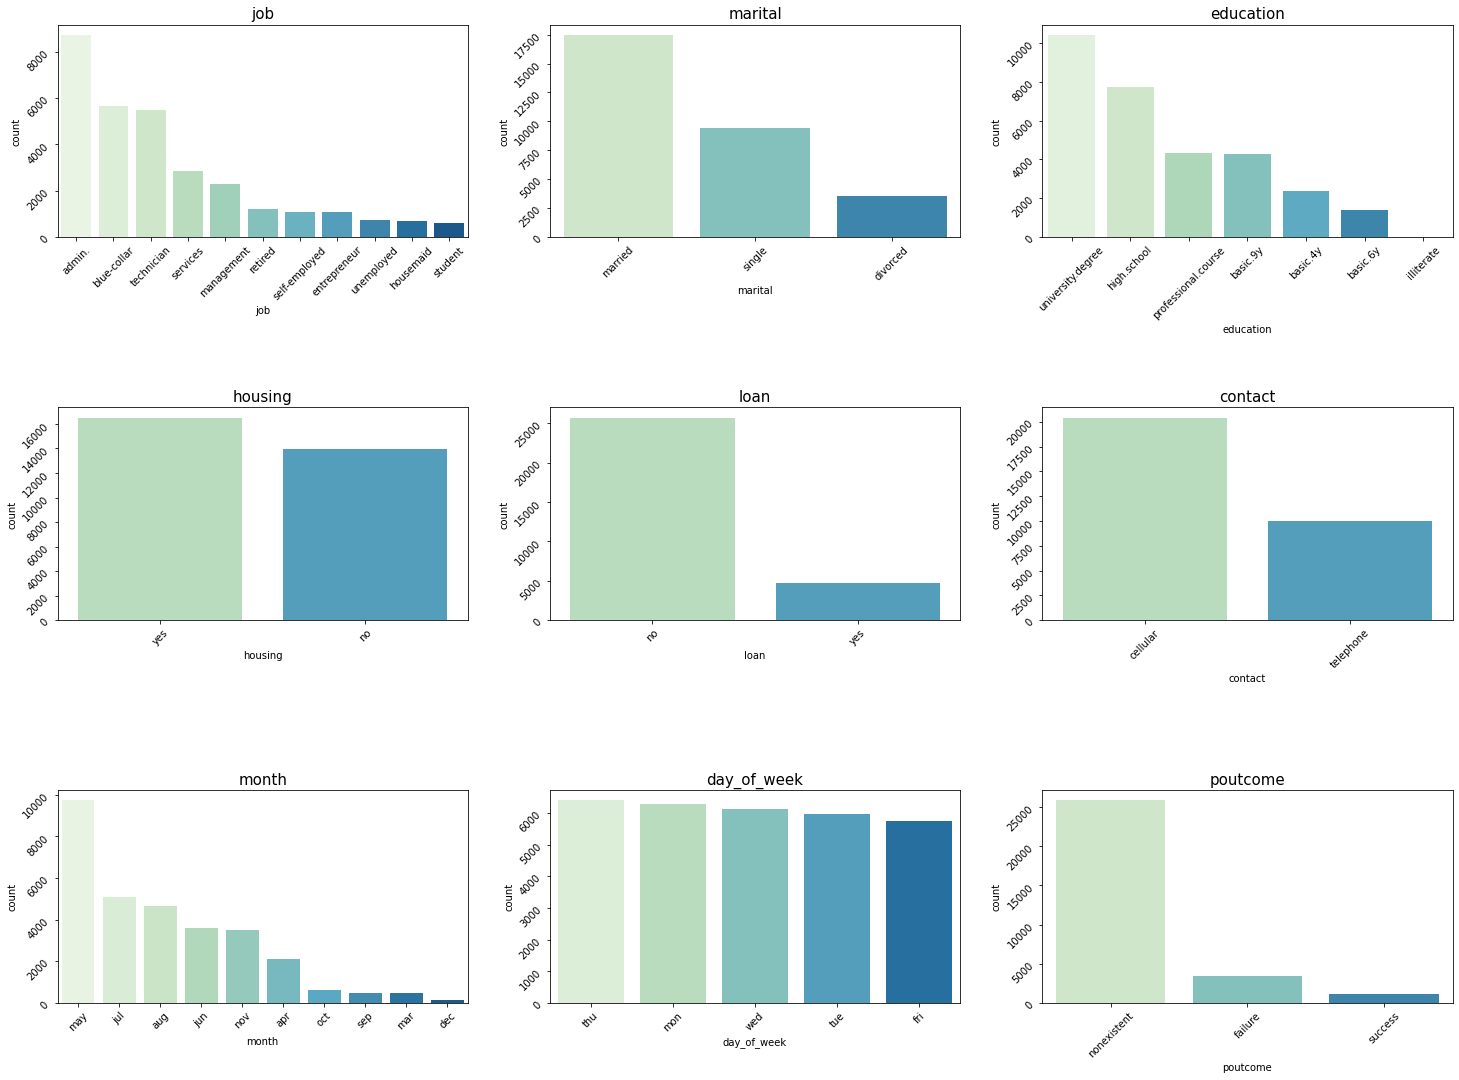

In [11]:
fig, ax = plt.subplots(3,3, figsize=(25,18))
features = features[:-1]
ax = ax.ravel()
pos = 0
for i in features:
    
    cur = df[i].value_counts().index
    sns.countplot(data=df, x=i, ax=ax[pos], palette='GnBu', order=cur)
    ax[pos].tick_params(labelrotation=45)
    ax[pos].set_title(i, fontdict={'fontsize':15})
    
    pos += 1

plt.subplots_adjust(hspace=0.8)

plt.show()

In education category, it is shown that the values such as basic.4y,basic.6y and basic.9y are the classes under primary and middle school which could have same impact towards the probability of the bank getting call back from the client. So we can merge all these categories into a single feature "middle.school".

In [12]:
list=['basic.4y','basic.6y','basic.9y']
for feature in list:
    df.loc[df['education'] == feature, 'education'] = "middle.school"

print(df['education'].value_counts())

university.degree      10412
middle.school           8045
high.school             7699
professional.course     4321
illiterate                11
Name: education, dtype: int64


In [13]:
df['education'].value_counts().index

Index(['university.degree', 'middle.school', 'high.school',
       'professional.course', 'illiterate'],
      dtype='object')

For the variables like poutcome ,the values are categorized into three parts. non-existent(unknown values), failure and success. As the non-existent and failure features resemble the same, they can be merged into one. 

In [14]:
df.poutcome.value_counts()

nonexistent    25836
failure         3461
success         1191
Name: poutcome, dtype: int64

In [15]:
df.poutcome = df.poutcome.map({'failure':0,'nonexistent':0, 'success':1}).astype('uint8') 
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,middle.school,no,no,telephone,may,mon,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,37,services,married,high.school,yes,no,telephone,may,mon,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,40,admin.,married,middle.school,no,no,telephone,may,mon,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,married,high.school,no,yes,telephone,may,mon,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,59,admin.,married,professional.course,no,no,telephone,may,mon,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,retired,married,professional.course,yes,no,cellular,nov,fri,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes
30484,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
30485,56,retired,married,university.degree,yes,no,cellular,nov,fri,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
30486,44,technician,married,professional.course,no,no,cellular,nov,fri,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes


In [16]:
df.loc[df['pdays'] == 999, 'pdays'] = 0

In [17]:
df.y = df.y.map({'yes':1, 'no':0}).astype('uint8')

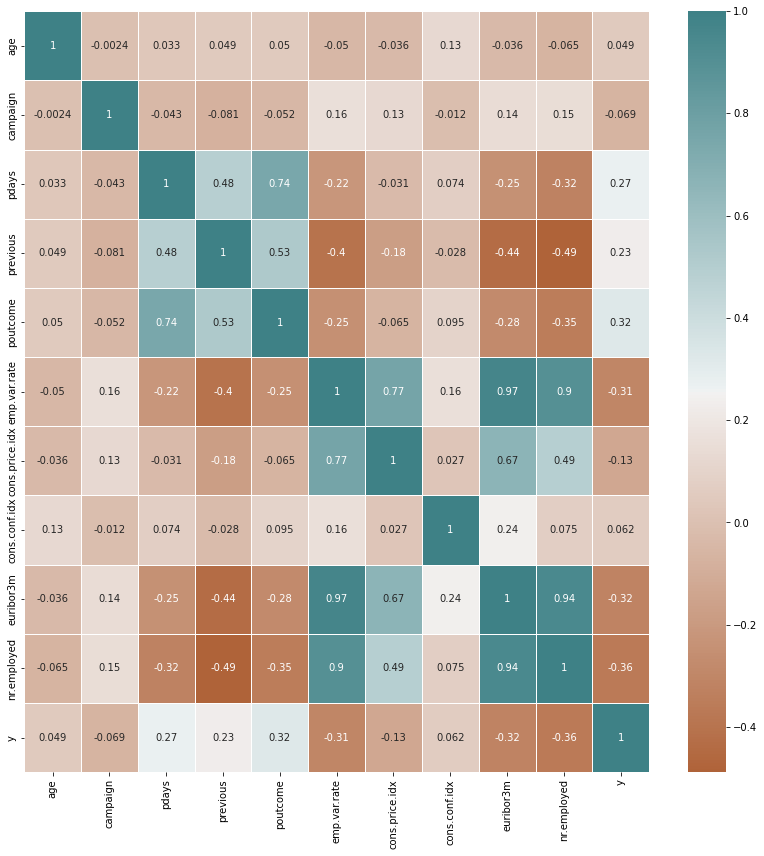

In [18]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(30, 200, as_cmap=True),linewidths=.5)
plt.show()

As it is clear that the features poutcome and previous are correlated so categorizing the previous feature values into just two parts 1 or 0 can still manage to not lose any important information for prediction.

In [19]:
df.previous = df.previous.apply(lambda x: 0 if x < 0 else 1).astype('uint8') 

Similarily nr.employed,emp.var.rate and euribor3m are highly correlated. So any one relevant feature is enough to store the required information for prediction.

In [20]:
df.drop(['nr.employed','emp.var.rate'], axis = 1, inplace=True)

In [21]:
df.describe()

,age,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
count,30488.000000,30488.000000,30488.000000,30488.0,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,2.521451,0.257052,1.0,0.039065,93.523311,-40.602263,3.459938,0.126574
std,10.333529,2.720150,1.448094,0.0,0.193752,0.585374,4.789249,1.777231,0.332501
min,17.000000,1.000000,0.000000,1.0,0.000000,92.201000,-50.800000,0.634000,0.000000
25%,31.000000,1.000000,0.000000,1.0,0.000000,93.075000,-42.700000,1.313000,0.000000
50%,37.000000,2.000000,0.000000,1.0,0.000000,93.444000,-41.800000,4.856000,0.000000
75%,45.000000,3.000000,0.000000,1.0,0.000000,93.994000,-36.400000,4.961000,0.000000
max,95.000000,43.000000,27.000000,1.0,1.000000,94.767000,-26.900000,5.045000,1.000000


As shown above, it is clear that the age values are distributed such that the ages of the clients would be around mid 30's and 40's (based on the above mean) 

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
object_features = ["job","marital","education","housing","loan","contact","month","day_of_week"]
for i in object_features:  
    df[i] = encoder.fit_transform(df[i])

In [23]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,3,1,2,0,0,1,6,1,1,0,1,0,93.994,-36.4,4.857,0
1,37,7,1,0,1,0,1,6,1,1,0,1,0,93.994,-36.4,4.857,0
2,40,0,1,2,0,0,1,6,1,1,0,1,0,93.994,-36.4,4.857,0
3,56,7,1,0,0,1,1,6,1,1,0,1,0,93.994,-36.4,4.857,0
4,59,0,1,3,0,0,1,6,1,1,0,1,0,93.994,-36.4,4.857,0


In [24]:
#Data Splitting Libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [25]:
X = df.iloc[:,df.columns != 'y']
y = df.y
X.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m'],
      dtype='object')

In [26]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [27]:
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier1.fit(x1_train, y1_train)

accuracy_list = cross_val_score(estimator = classifier1, X = x1_train, y = y1_train, cv = 5)
mean=accuracy_list.mean()
std=accuracy_list.std()

print('Statistics after 5 fold cross validation:')
print('Accuracy list mean: ',mean*100,end='\n')
print('Standard deviation ',std*100,end='\n')

#predict y
y = classifier1.predict(x1_test)

#Confusion Matrix
print('Output:')
print('Confusion Matrix:')
print(confusion_matrix(y1_test, y))
print('classification Report:')
print(classification_report(y1_test, y))
print('Accuracy: ',accuracy_score(y1_test,y))

Statistics after 5 fold cross validation:
Accuracy list mean:  82.84050157375715
Standard deviation  0.5091513307013484
Output:
Confusion Matrix:
[[7212  799]
 [ 729  407]]
classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      8011
           1       0.34      0.36      0.35      1136

    accuracy                           0.83      9147
   macro avg       0.62      0.63      0.63      9147
weighted avg       0.84      0.83      0.84      9147

Accuracy:  0.8329506942166831


In [28]:
classifier2 = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier2.fit(x1_train, y1_train)

accuracy_list = cross_val_score(estimator = classifier2, X = x1_train, y = y1_train, cv = 5)
mean=accuracy_list.mean()
std=accuracy_list.std()

print('Statistics after 5 fold cross validation:')
print('Accuracy list mean: ',mean*100,end='\n')
print('Standard deviation ',std*100,end='\n')

#predict y
y = classifier2.predict(x1_test)

#Confusion Matrix
print('Output:')
print('Confusion Matrix:')
print(confusion_matrix(y1_test, y))
print('classification Report:')
print(classification_report(y1_test, y))
print('Accuracy: ',accuracy_score(y1_test,y))

Statistics after 5 fold cross validation:
Accuracy list mean:  82.64837411358845
Standard deviation  0.8261099397784484
Output:
Confusion Matrix:
[[7166  845]
 [ 725  411]]
classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      8011
           1       0.33      0.36      0.34      1136

    accuracy                           0.83      9147
   macro avg       0.62      0.63      0.62      9147
weighted avg       0.84      0.83      0.83      9147

Accuracy:  0.8283590248168798


In [29]:
parameters = [{'criterion': ['entropy'],'min_samples_leaf':[5,10,20,50,100],'max_depth':[5,10,20,50,100]}] 
best_fit = GridSearchCV(estimator = classifier1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
best_fit = best_fit.fit(x1_train, y1_train)
best_accuracy = best_fit.best_score_
best_parameters = best_fit.best_params_

print('Accuracy: ',best_accuracy,end='\n')
print('Best Parameters: ',best_parameters,end='\n')

Accuracy:  0.8844475855393551
Best Parameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}


In [30]:
classifier1 = RandomForestClassifier(max_depth=25, random_state=0,n_estimators=100)
#(criterion = 'entropy', random_state = 0)
classifier1.fit(x1_train, y1_train)

accuracy_list = cross_val_score(estimator = classifier1, X = x1_train, y = y1_train, cv = 5)
mean=accuracy_list.mean()
std=accuracy_list.std()

print('Statistics after 5 fold cross validation:')
print('Accuracy list mean: ',mean*100,end='\n')
print('Standard deviation ',std*100,end='\n')

#predict y
y = classifier1.predict(x1_test)

#Confusion Matrix
print('Output:')
print('Confusion Matrix:')
print(confusion_matrix(y1_test, y))
print('classification Report:')
print(classification_report(y1_test, y))
print('Accuracy: ',accuracy_score(y1_test,y))

Statistics after 5 fold cross validation:
Accuracy list mean:  87.9808839604103
Standard deviation  0.3322675334911672
Output:
Confusion Matrix:
[[7682  329]
 [ 771  365]]
classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      8011
           1       0.53      0.32      0.40      1136

    accuracy                           0.88      9147
   macro avg       0.72      0.64      0.67      9147
weighted avg       0.86      0.88      0.87      9147

Accuracy:  0.8797419919099159


In [31]:
parameters = [{'criterion': ['entropy'],'max_depth':[5,10,20,50,100]}] 
best_fit = GridSearchCV(estimator = classifier1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           )
best_fit = best_fit.fit(x1_train, y1_train)
best_accuracy = best_fit.best_score_
best_parameters = best_fit.best_params_

print('Best accuracy: ',best_accuracy,end='\n')
print('Best parameters: ',best_parameters,end='\n')

Best accuracy:  0.8863689382029465
Best parameters:  {'criterion': 'entropy', 'max_depth': 10}


In [32]:
best = 0;
best_index = 0; 
for i in range(1,16):
    classifier1 = KNeighborsClassifier(n_neighbors = i)
    #(criterion = 'entropy', random_state = 0) 
    classifier1.fit(x1_train, y1_train)

    accuracy_list = cross_val_score(estimator = classifier1, X = x1_train, y = y1_train, cv = 5)
    mean=accuracy_list.mean()
    std=accuracy_list.std()
    score = accuracy_score(y1_test,y)
    if(score > best):
        best = score
        best_index = i;
    print('Statistics after 5 fold cross validation:')
    print('Accuracy list mean: ',mean*100,end='\n')
    print('Standard deviation ',std*100,end='\n')

    
    #predict y
    y = classifier1.predict(x1_test)

    #Confusion Matrix
    print('Output:')
    print('Confusion Matrix:')
    print(confusion_matrix(y1_test, y))
    print('classification Report:')
    print(classification_report(y1_test, y))
    print('Accuracy: ',accuracy_score(y1_test,y))
    

Statistics after 5 fold cross validation:
Accuracy list mean:  83.63241415026884
Standard deviation  0.5126762913961319
Output:
Confusion Matrix:
[[7232  779]
 [ 750  386]]
classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      8011
           1       0.33      0.34      0.34      1136

    accuracy                           0.83      9147
   macro avg       0.62      0.62      0.62      9147
weighted avg       0.83      0.83      0.83      9147

Accuracy:  0.832841368754783
Statistics after 5 fold cross validation:
Accuracy list mean:  87.40452682675806
Standard deviation  0.285254481633715
Output:
Confusion Matrix:
[[7799  212]
 [ 951  185]]
classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      8011
           1       0.47      0.16      0.24      1136

    accuracy                           0.87      9147
   macro avg       0.68      0.57  

In [33]:
print("accuracy:",best*100)
best_index 

accuracy: 87.97419919099158


1

In [34]:
from sklearn.ensemble import AdaBoostClassifier
classifier= AdaBoostClassifier(random_state=1)
classifier.fit(x1_train, y1_train)

accuracy_list = cross_val_score(estimator = classifier, X = x1_train, y = y1_train, cv = 5)
mean=accuracy_list.mean()
std=accuracy_list.std()

print('Statistics after 5 fold cross validation:')
print('Accuracy list mean: ',mean*100,end='\n')
print('Standard deviation ',std*100,end='\n')

#predict y
y = classifier.predict(x1_test)

#Confusion Matrix
print('Output:')
print('Confusion Matrix:')
print(confusion_matrix(y1_test, y))
print('classification Report:')
print(classification_report(y1_test, y))
print('Accuracy: ',accuracy_score(y1_test,y))

Statistics after 5 fold cross validation:
Accuracy list mean:  88.49161573937168
Standard deviation  0.42315224590617867
Output:
Confusion Matrix:
[[7862  149]
 [ 860  276]]
classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8011
           1       0.65      0.24      0.35      1136

    accuracy                           0.89      9147
   macro avg       0.78      0.61      0.65      9147
weighted avg       0.87      0.89      0.87      9147

Accuracy:  0.8896906089428228
